In [1]:
import mne
import matplotlib.pyplot as plt
from nilearn.masking import apply_mask, compute_epi_mask
import numpy as np

path_eeg = '/home/david/eeg_informed_fmri/datasets/'

dataset = '01/fMRI/'

individual = '35/'

fmri_file = '3_nw_mepi_rest_with_cross.nii.gz'

complete_path = path_eeg + dataset + individual + fmri_file

/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


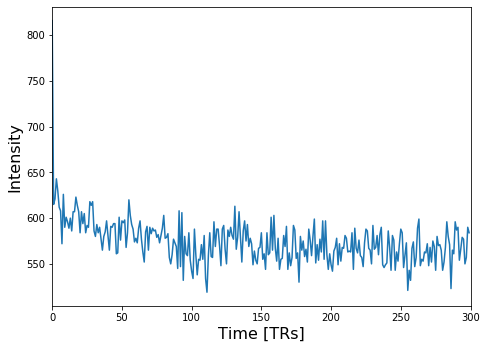

In [12]:
mask_img = compute_epi_mask(complete_path)

masked_data = apply_mask(complete_path, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels



# And now plot a few of these
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:, 5:6])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, masked_data.shape[0])
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()